# OpenPIV on the bridgepile_wake

See the post on LinkedIn by Stefano Brizzolara
https://www.linkedin.com/posts/stefano-brizzolara-6a8501198_rheinfall-flowvisualization-ugcPost-6672832128742408192-lRub

In [1]:
from openpiv import tools, pyprocess, validation, filters, scaling 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import imageio

In [2]:
frame_a  = tools.imread('../test8/frame0001.tif')
frame_b  = tools.imread('../test8/frame0002.tif')

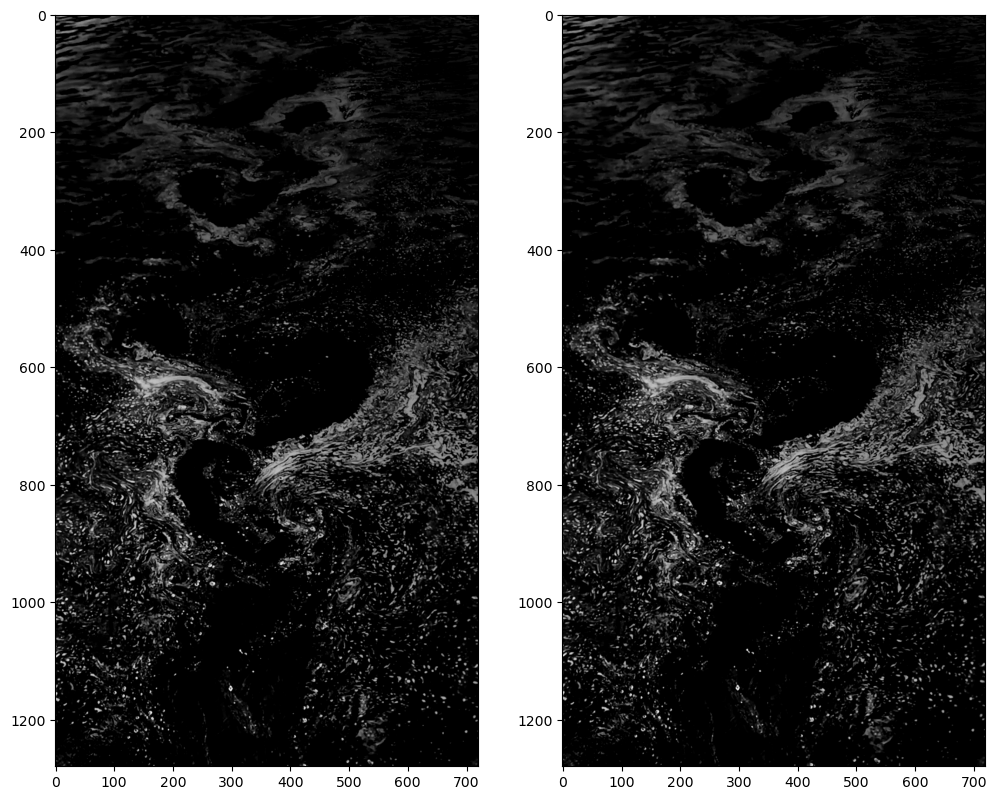

In [3]:
fig,ax = plt.subplots(1,2,figsize=(12,10))
ax[0].imshow(frame_a,cmap=plt.cm.gray)
ax[1].imshow(frame_b,cmap=plt.cm.gray)

In [4]:
# %pdb
# np.seterr(all="raise")
winsize = 24 # pixels
searchsize = 48  # pixels, search in image B
overlap = 12 # pixels
dt = 1./30 # sec, assume 30 fps

frame_a[:600,:] = 0  # basically masking out the non-illuminated region
frame_b[:600,:] = 0


u0, v0, sig2noise = pyprocess.extended_search_area_piv(frame_a.astype(np.int32), 
                                                       frame_b.astype(np.int32), 
                                                       window_size=winsize, 
                                                       overlap=overlap, dt=dt, 
                                                       search_area_size=searchsize, 
                                                       sig2noise_method='peak2peak',
                                                      correlation_method='linear',
                                                      normalized_correlation=True)

In [5]:
x, y = pyprocess.get_coordinates(frame_a.shape,searchsize, overlap)

In [6]:
mask = validation.sig2noise_val(sig2noise, threshold = 1.2)

In [7]:
u2, v2 = filters.replace_outliers( u0, v0, mask, method='localmean', max_iter=1, kernel_size=3)

In [8]:
# x, y, u3, v3 = scaling.uniform(x, y, u2, v2, scaling_factor = 1. )

In [9]:
x, y, u2, v2 = tools.transform_coordinates(x, y, u2, v2)
tools.save(x, y, u2, v2, mask, 'exp1_001.txt' )

In [13]:
# tools.display_vector_field('exp1_001.txt', scaling_factor=100., width=0.0025)

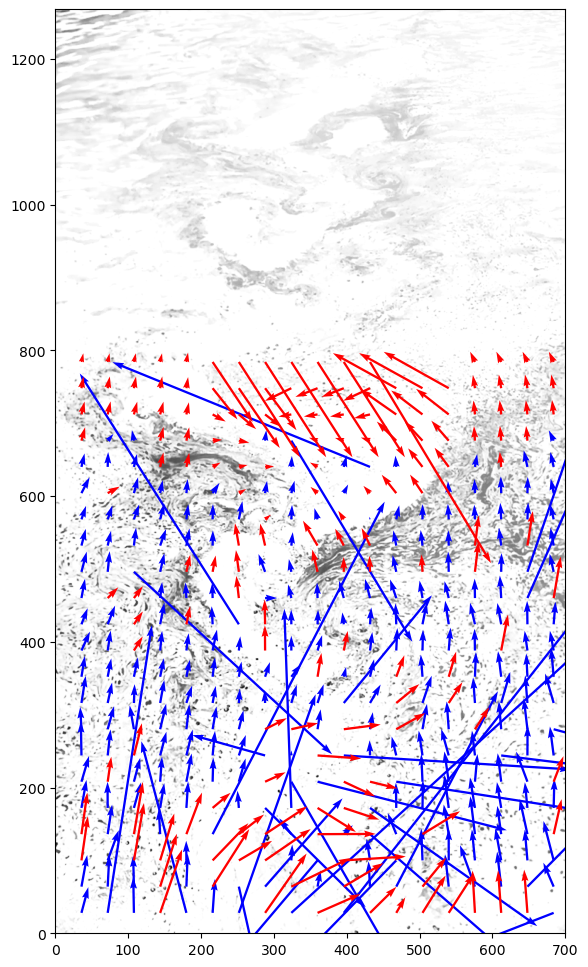

In [14]:
# If you need a larger view:
fig, ax = plt.subplots(figsize=(12,12))
tools.display_vector_field('exp1_001.txt', ax=ax, scaling_factor=1.0, 
                           scale=1000, width=0.0045, on_img=True, 
                           image_name='../test8/frame0001.tif');

In [13]:
from openpiv.windef import Settings, Multiprocesser, piv

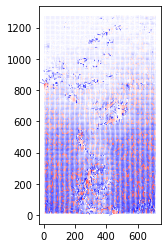

Image Pair 1
c:\Users\alex\repos\openpiv-python-examples\test8\frame0001.tif c:\Users\alex\repos\openpiv-python-examples\test8\frame0002.tif


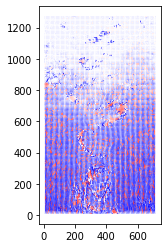

Image Pair 2
c:\Users\alex\repos\openpiv-python-examples\test8\frame0002.tif c:\Users\alex\repos\openpiv-python-examples\test8\frame0003.tif


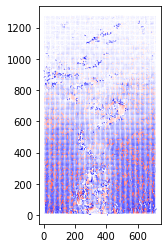

Image Pair 3
c:\Users\alex\repos\openpiv-python-examples\test8\frame0003.tif c:\Users\alex\repos\openpiv-python-examples\test8\frame0004.tif


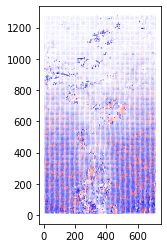

Image Pair 4
c:\Users\alex\repos\openpiv-python-examples\test8\frame0004.tif c:\Users\alex\repos\openpiv-python-examples\test8\frame0005.tif


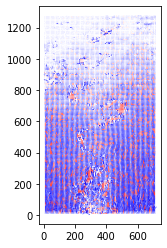

Image Pair 5
c:\Users\alex\repos\openpiv-python-examples\test8\frame0005.tif c:\Users\alex\repos\openpiv-python-examples\test8\frame0006.tif


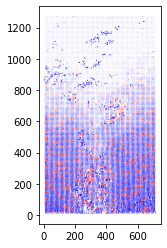

Image Pair 6
c:\Users\alex\repos\openpiv-python-examples\test8\frame0006.tif c:\Users\alex\repos\openpiv-python-examples\test8\frame0007.tif


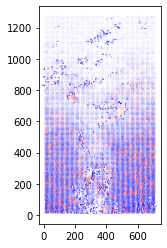

Image Pair 7
c:\Users\alex\repos\openpiv-python-examples\test8\frame0007.tif c:\Users\alex\repos\openpiv-python-examples\test8\frame0008.tif


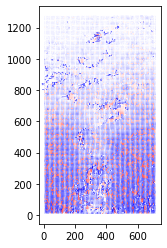

Image Pair 8
c:\Users\alex\repos\openpiv-python-examples\test8\frame0008.tif c:\Users\alex\repos\openpiv-python-examples\test8\frame0009.tif


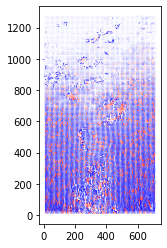

Image Pair 9
c:\Users\alex\repos\openpiv-python-examples\test8\frame0009.tif c:\Users\alex\repos\openpiv-python-examples\test8\frame0010.tif


In [14]:
settings = Settings()
settings.filepath_images = '../test8'
settings.frame_pattern_a = 'frame00*.tif'
settings.frame_pattern_b = '(1+2),(2+3)'
piv(settings)
